# Worksheet 21

Name: Haoxiang Huo
UID: U13668934

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

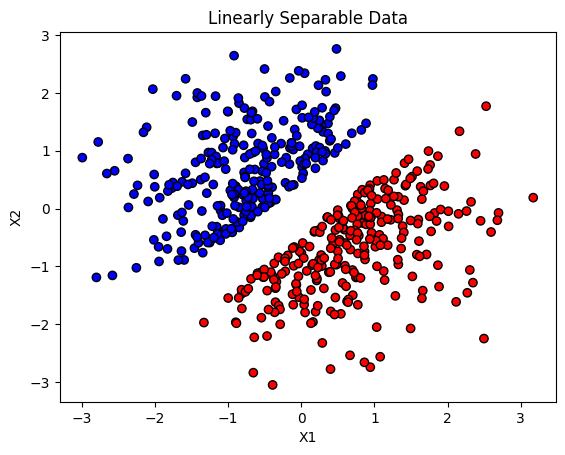

In [3]:

# recall function to generate linearly separable data
def generate_line_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generating the linearly separable data
X, Y = generate_line_data()

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [5]:
# Function to generate linearly separable data
def generate_line_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generating the linearly separable data
X, Y = generate_line_data()

# Fitting the logistic regression model
model = LogisticRegression().fit(X, Y)

# Printing the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 4.11337993 -4.10105513]]
Intercept: [0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

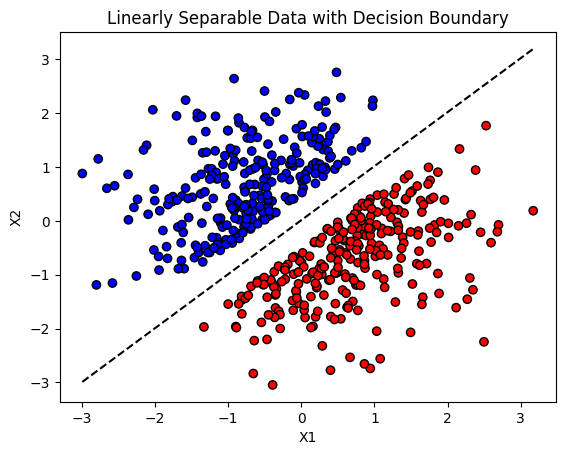

In [6]:
# Function to generate linearly separable data
def generate_line_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generating the linearly separable data
X, Y = generate_line_data()

# Fitting the logistic regression model
model = LogisticRegression().fit(X, Y)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')

# Coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Line equation: x2 = m * x1 + c
m = -w[0] / w[1]
c = -b / w[1]

# Generating x values and corresponding y values for the line
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = m * x_values + c

# Plotting the decision boundary
plt.plot(x_values, y_values, 'k--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable Data with Decision Boundary')
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

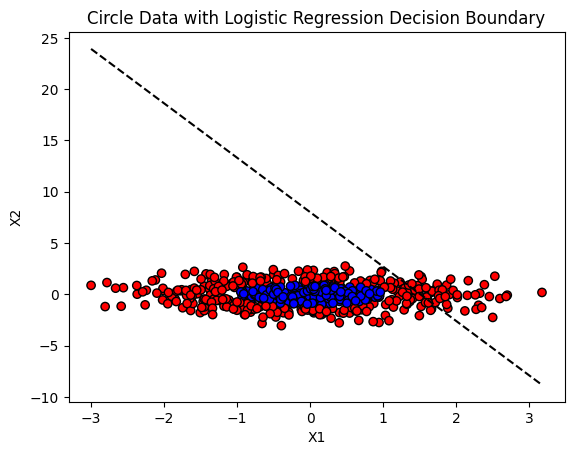

In [7]:
# Function to generate circle data
def generate_circle_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generating the circle data
X, Y = generate_circle_data()

# Fitting the logistic regression model
model = LogisticRegression().fit(X, Y)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')

# Coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Line equation: x2 = m * x1 + c
m = -w[0] / w[1]
c = -b / w[1]

# Generating x values and corresponding y values for the line
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = m * x_values + c

# Plotting the decision boundary
plt.plot(x_values, y_values, 'k--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circle Data with Logistic Regression Decision Boundary')
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Function to generate circle data (which we will treat as elliptical for this example)
def generate_circle_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generating the circle data
X, Y = generate_circle_data()

# Transforming the data to include quadratic terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fitting the logistic regression model
model = LogisticRegression().fit(X_poly, Y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.02985162 -0.04753247  4.90954898  0.37928     4.95645605]]
Intercept: [-6.47659385]


f) Plot the decision boundary using the code below.

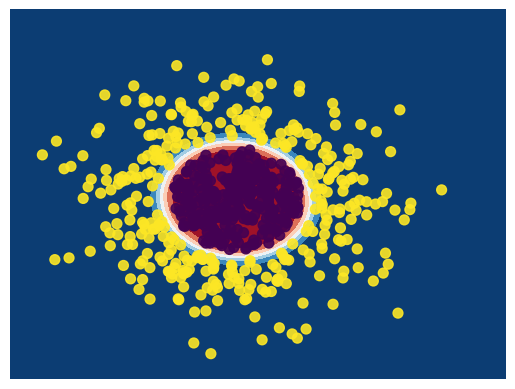

In [10]:
# Function to generate circle data
def generate_circle_data():
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generating the circle data
X, Y = generate_circle_data()

# Transforming the data to include quadratic terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fitting the logistic regression model
model = LogisticRegression().fit(X_poly, Y)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transforming mesh data using the same polynomial features
meshData = np.c_[xx.ravel(), yy.ravel()]
meshData_poly = poly.transform(meshData)

# Predicting probabilities and classes for the mesh
A = model.predict_proba(meshData_poly)[:, 1].reshape(xx.shape)
Z = model.predict(meshData_poly).reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

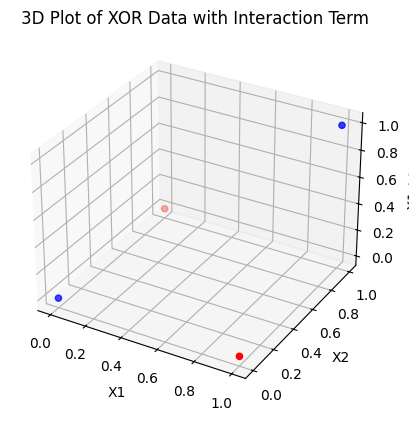

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# X, Y = generate_xor_data()
# ax = plt.axes(projection='3d')
# ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
# plt.show()

# Function to generate XOR data
def generate_xor_data():
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

# Generating XOR data
X, Y = generate_xor_data()

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 0] * X[:, 1], c=Y, cmap='bwr')

# Labelling axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1 * X2')

# Showing the plot
plt.title('3D Plot of XOR Data with Interaction Term')
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

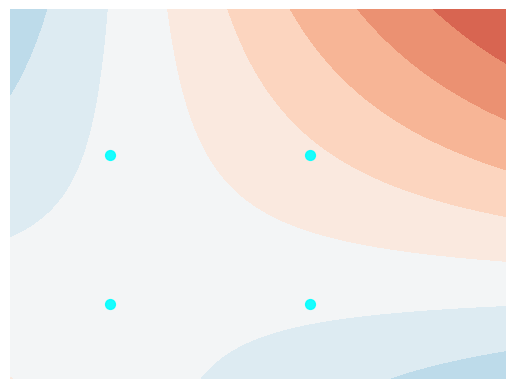

In [13]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [14]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'ipympl'

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [18]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

# Generate circles data
X, Y = generate_circles_data(t)

# Fit logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Predicting for each point in the mesh
Z = model.predict(poly.transform(meshData)).reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression with Polynomial Features on Concentric Circles")
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 6 features, but PolynomialFeatures is expecting 2 features as input.